<a href="https://colab.research.google.com/github/Utkarshmishra2k2/Focus_on_Vision-A_Statistical_Study_of_Eye/blob/main/Focus_on_Vision_A_Statistical_Study_of_Eye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard Libraries
import numpy as np
import pandas as pd
import joblib
from collections import Counter

# Data Preprocessing and Transformation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Statistical Analysis and Feature Selection
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning and Deep Learning
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras

# Model Evaluation
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
data_01 = pd.read_excel('https://raw.githubusercontent.com/Utkarshmishra2k2/Focus_on_Vision-A_Statistical_Study_of_Eye/refs/heads/main/DATA:Focus%20on%20Vision_%20A%20Statistical%20Study%20of%20Eye.xlsx')

# Data Processing

In [3]:
columns = {
    "1": "age",
    "2": "gender",
    "3": "occupation",
    "4": "education",
    "5": "environment",
    "6": "screen_hours",
    "7": "device",
    "8": "screen_use_purpose",
    "9": "screen_symptoms",
    "10": "reading_medium",
    "11": "reading_hours",
    "12": "night_mode",
    "13": "theme_usage",
    "14": "dark_usage",
    "15": "blue_light_usage",
    "16": "outdoor_activity",
    "17": "sunlight_hours",
    "18": "exercise_frequency",
    "19": "wear_sunglasses",
    "20": "lighting_conditions",
    "21": "take_breaks",
    "22": "sleep_hours",
    "23": "device_before_bedtime",
    "24": "eye_strain_reduction",
    "25": "nutrient_intake",
    "26": "air_quality",
    "27": "smoking_status",
    "28": "vision_correction",
    "29": "age_vision_correction",
    "30": "left_eye_power",
    "31": "right_eye_power",
    "32": "reason_vision_correction",
    "33": "screen_fatigue",
    "34": "activity_duration",
    "35": "eye_checkup_frequency",
    "36": "eye_self_care",
    "37": "future_vision_correction",
    "38": "corrective_procedures",
    "39": "surgical_procedure",
    "40": "surgery_age",
    "41": "procedure_effectiveness",
    "42": "parents_vision_problems",
    "43": "parent_with_vision_issues",
    "44": "parent_tools",
    "45": "parent_vision_problems",
    "46": "father_age_vision_correction",
    "47": "mother_age_vision_correction",
    "48": "relatives_vision_problems",
    "49": "relative_with_vision_issues",
    "50": "relative_tools",
    "51": "relative_vision_problems",
    "52": "relative_age_vision_correction",
    "53": "offspring_vision_problems",
    "54": "offspring_vision_problems_type",
    "55": "offspring_diagnosis_age",
    "56": "offspring_using_correction_tools",
    "57": "offspring_screen_time",
    "58": "offspring_outdoor_time",
    "59": "vision_influence_on_children",
    "60": "steps_to_prevent_children_vision",
    "61": "district"
}

In [4]:
data_01.columns = data_01.columns.str.strip()
data_01.rename(columns=columns, inplace=True)

In [5]:
data_01.dtypes

,0
age,int64
gender,object
occupation,object
education,object
environment,object
...,...
offspring_screen_time,float64
offspring_outdoor_time,float64
vision_influence_on_children,float64
steps_to_prevent_children_vision,float64


In [6]:
data_01.isnull().sum()

,0
age,0
gender,0
occupation,0
education,0
environment,0
...,...
offspring_screen_time,1404
offspring_outdoor_time,1404
vision_influence_on_children,1408
steps_to_prevent_children_vision,1408


In [7]:
(data_01.isnull().sum() / len(data_01)) * 100

,0
age,0.000000
gender,0.000000
occupation,0.000000
education,0.000000
environment,0.000000
...,...
offspring_screen_time,99.715909
offspring_outdoor_time,99.715909
vision_influence_on_children,100.000000
steps_to_prevent_children_vision,100.000000


In [8]:
data_01.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1408.0,NaN,NaN,NaN,21.613636,3.373653,17.0,19.0,21.0,23.0,45.0
gender,1408,2,Female,717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,1408,5,Student,1228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,1408,9,Bachelor's Degree,715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environment,1408,2,Suburban,1141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
offspring_screen_time,4.0,NaN,NaN,NaN,13.25,7.182154,9.0,9.75,10.0,13.5,24.0
offspring_outdoor_time,4.0,NaN,NaN,NaN,3.5,3.41565,0.0,1.5,3.0,5.0,8.0
vision_influence_on_children,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
steps_to_prevent_children_vision,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 61 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               1408 non-null   int64  
 1   gender                            1408 non-null   object 
 2   occupation                        1408 non-null   object 
 3   education                         1408 non-null   object 
 4   environment                       1408 non-null   object 
 5   screen_hours                      1408 non-null   int64  
 6   device                            1408 non-null   object 
 7   screen_use_purpose                1408 non-null   object 
 8   screen_symptoms                   1408 non-null   object 
 9   reading_medium                    1404 non-null   object 
 10  reading_hours                     1408 non-null   float64
 11  night_mode                        1408 non-null   object 
 12  theme_

In [10]:
def has_glasses(row):
    vc = row.get("vision_correction")
    print(f"Processing row: vision_correction = {vc}, left_eye_power = {row.get('left_eye_power')}, right_eye_power = {row.get('right_eye_power')}, age_vision_correction = {row.get('age_vision_correction')}")
    left_power = row.get("left_eye_power")
    right_power = row.get("right_eye_power")
    if (pd.isnull(left_power) or left_power == 0) and (pd.isnull(right_power) or right_power == 0):
        return "No"
    if pd.notnull(left_power) and left_power != 0:
        return "Yes"
    if pd.notnull(right_power) and right_power != 0:
        return "Yes"
    if pd.notnull(row.get("age_vision_correction")) and vc in ["Glasses", "Contact Lenses","Surgical Correction",'Vision Therapy']:
        return "Yes"
    return "No"
data_01["has_or_had_glasses"] = data_01.apply(has_glasses, axis=1)
print(data_01[["vision_correction", "left_eye_power", "right_eye_power", "age_vision_correction", "has_or_had_glasses"]].head())
print(data_01["has_or_had_glasses"].value_counts())

Processing row: vision_correction = nan, left_eye_power = 0.0, right_eye_power = 0.0, age_vision_correction = Not Applicable
Processing row: vision_correction = nan, left_eye_power = 0.0, right_eye_power = 0.0, age_vision_correction = Not Applicable
Processing row: vision_correction = nan, left_eye_power = 0.0, right_eye_power = 0.0, age_vision_correction = Not Applicable
Processing row: vision_correction = Glasses, left_eye_power = 0.0, right_eye_power = 0.0, age_vision_correction = 13
Processing row: vision_correction = Glasses, left_eye_power = 0.0, right_eye_power = 0.0, age_vision_correction = 13
Processing row: vision_correction = nan, left_eye_power = 0.0, right_eye_power = 0.0, age_vision_correction = Not Applicable
Processing row: vision_correction = nan, left_eye_power = 0.0, right_eye_power = 0.0, age_vision_correction = Not Applicable
Processing row: vision_correction = nan, left_eye_power = 0.0, right_eye_power = 0.0, age_vision_correction = Not Applicable
Processing row: 

In [11]:
print(data_01['has_or_had_glasses'].value_counts())

has_or_had_glasses
Yes    1308
No      100
Name: count, dtype: int64


In [12]:
all_missing_cols = data_01.columns[data_01.isnull().all()]

In [13]:
df_dropped = data_01.drop(all_missing_cols, axis=1)

In [14]:
data_01.drop(['air_quality'], axis=1,inplace=True)

In [15]:
numerical_cols = df_dropped.select_dtypes(include=['number']).columns
categorical_cols = df_dropped.select_dtypes(exclude=['number']).columns

In [16]:
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [17]:
df_imputed = df_dropped.copy()
df_imputed[numerical_cols] = numerical_imputer.fit_transform(df_dropped[numerical_cols])
df_imputed[categorical_cols] = categorical_imputer.fit_transform(df_dropped[categorical_cols])

In [18]:
data_01 = df_imputed.copy()

In [19]:
categorical_columns = data_01.select_dtypes(include=['category', 'object']).columns
numerical_columns = data_01.select_dtypes(include=['number']).columns

In [20]:
data_01[categorical_columns] = data_01[categorical_columns].apply(lambda x: x.astype('category'))

In [21]:
for col in numerical_columns:
    data_01[col] = pd.to_numeric(data_01[col], errors='coerce')

In [22]:
aqi_dict = {
    'Dombivali': 59,
    'Ghatkopar': 102,
    'Kurla':102,
    'Bhandup': 106,
    'Mumbai Suburban': 102,
    'Thane': 79,
    'Palghar': 89,
    'Mumbai': 85,
    'Vasai': 72,
    'Virar': 71,
    'Kalyan': 93
}

In [23]:
data_01['air_quality'] = data_01['district'].astype(str).str.strip().map(aqi_dict)
data_01['air_quality'] = pd.to_numeric(data_01['air_quality'], errors='coerce')

# Statistical Analysis

In [24]:
def normality_tests(data_01, numeric_columns):
    """
    Perform multiple normality tests on the numeric columns of a dataset.

    This function applies three statistical tests for normality to each numeric column in the
    input DataFrame `data_01`. It calculates the following tests:
    1. Shapiro-Wilk Test
    2. Kolmogorov-Smirnov (KS) Test
    3. Anderson-Darling Test

    For each test, the function computes the test statistic and p-value (where applicable).
    The results of these tests are stored in a list of dictionaries and then returned as
    a pandas DataFrame.

    Parameters:
    ----------
    data_01 : pandas.DataFrame
        The DataFrame containing the data. It must have numeric columns that you want to test for normality.

    numeric_columns : list
        A list of column names (strings) in the DataFrame `data_01` that are numeric and should be tested for normality.

    Returns:
    -------
    pandas.DataFrame
        A DataFrame containing the results of the normality tests for each numeric column.
        The DataFrame includes the following columns:
        - 'Column': Name of the column.
        - 'Shapiro-Wilk Statistic': The test statistic for the Shapiro-Wilk test.
        - 'Shapiro-Wilk p-value': The p-value for the Shapiro-Wilk test.
        - 'KS Statistic': The test statistic for the Kolmogorov-Smirnov test.
        - 'KS p-value': The p-value for the Kolmogorov-Smirnov test.
        - 'Anderson-Darling Statistic': The test statistic for the Anderson-Darling test.
        - 'Anderson-Darling Critical Values': The critical values from the Anderson-Darling test.
        - 'Anderson-Darling Significance Levels': The significance levels for the Anderson-Darling test.

    Example:
    --------
    normality_df = normality_tests(data_01, ['col1', 'col2', 'col3'])

    This will apply the three normality tests to the columns 'col1', 'col2', and 'col3'
    of the DataFrame `data_01` and return the results in `normality_df`.
    """

    normality_results = []
    for col in numeric_columns:
        shapiro_stat, shapiro_p = stats.shapiro(data_01[col].dropna())
        ks_stat, ks_p = stats.kstest(data_01[col].dropna(), 'norm', args=(data_01[col].mean(), data_01[col].std()))
        anderson_result = stats.anderson(data_01[col].dropna(), dist='norm')
        normality_results.append({
            'Column': col,
            'Shapiro-Wilk Statistic': shapiro_stat,
            'Shapiro-Wilk p-value': shapiro_p,
            'KS Statistic': ks_stat,
            'KS p-value': ks_p,
            'Anderson-Darling Statistic': anderson_result.statistic,
            'Anderson-Darling Critical Values': anderson_result.critical_values,
            'Anderson-Darling Significance Levels': anderson_result.significance_level
        })

    return pd.DataFrame(normality_results)
normality_tests(data_01, numerical_columns)

,Column,Shapiro-Wilk Statistic,Shapiro-Wilk p-value,KS Statistic,KS p-value,Anderson-Darling Statistic,Anderson-Darling Critical Values,Anderson-Darling Significance Levels
0,age,0.815991,2.372550e-37,0.208457,3.799786e-54,80.445633,"[0.574, 0.654, 0.785, 0.915, 1.089]","[15.0, 10.0, 5.0, 2.5, 1.0]"
1,screen_hours,0.941846,4.369327e-23,0.138125,6.792710e-24,24.358382,"[0.574, 0.654, 0.785, 0.915, 1.089]","[15.0, 10.0, 5.0, 2.5, 1.0]"
2,reading_hours,0.526438,9.388726e-52,0.280799,1.096616e-98,147.286007,"[0.574, 0.654, 0.785, 0.915, 1.089]","[15.0, 10.0, 5.0, 2.5, 1.0]"
3,dark_usage,0.765982,8.770224e-41,0.285049,9.682069e-102,134.374992,"[0.574, 0.654, 0.785, 0.915, 1.089]","[15.0, 10.0, 5.0, 2.5, 1.0]"
4,blue_light_usage,0.325888,9.290107e-58,0.422757,1.014207e-228,336.955739,"[0.574, 0.654, 0.785, 0.915, 1.089]","[15.0, 10.0, 5.0, 2.5, 1.0]"
5,sunlight_hours,0.713063,8.114336e-44,0.209878,6.875629e-55,77.137130,"[0.574, 0.654, 0.785, 0.915, 1.089]","[15.0, 10.0, 5.0, 2.5, 1.0]"
6,sleep_hours,0.898255,1.456161e-29,0.162205,7.783535e-33,48.166273,"[0.574, 0.654, 0.785, 0.915, 1.089]","[15.0, 10.0, 5.0, 2.5, 1.0]"
7,device_before_bedtime,0.931336,6.387327e-25,0.111144,1.324393e-15,27.066721,"[0.574, 0.654, 0.785, 0.915, 1.089]","[15.0, 10.0, 5.0, 2.5, 1.0]"
8,left_eye_power,0.942675,6.246043e-23,0.108292,7.801264e-15,22.287169,"[0.574, 0.654, 0.785, 0.915, 1.089]","[15.0, 10.0, 5.0, 2.5, 1.0]"
9,right_eye_power,0.884161,3.463794e-31,0.114710,1.350135e-16,23.834049,"[0.574, 0.654, 0.785, 0.915, 1.089]","[15.0, 10.0, 5.0, 2.5, 1.0]"


In [25]:
fig = make_subplots(rows=7, cols=5, subplot_titles=numerical_columns) # Changed rows and cols
for i, col in enumerate(numerical_columns):
    data = data_01[col].dropna()
    (theoretical_q, sample_q), _ = stats.probplot(data, dist="norm")
    row = i // 5 + 1
    col_index = i % 5 + 1
    fig.add_trace(
        go.Scatter(
            x=theoretical_q,
            y=sample_q,
            mode='markers',
            name=col,
            showlegend=False
        ),
        row=row, col=col_index
    )
    min_val = min(theoretical_q.min(), sample_q.min())
    max_val = max(theoretical_q.max(), sample_q.max())
    fig.add_trace(
        go.Scatter(
            x=[min_val, max_val],
            y=[min_val, max_val],
            mode='lines',
            line=dict(color='red', dash='dash'),
            showlegend=False
        ),
        row=row, col=col_index
    )

fig.update_layout(height=2500, width=1200, title_text="Q-Q Plots")
fig.show()

In [26]:
# normality = normality_tests(data_01, numerical_columns)
# normality.to_csv('normality.csv', index=False)

In [27]:
def spearman_correlation(data_01, numeric_columns):
    """
    Calculate Spearman's rank correlation for each pair of numeric columns in the dataset.

    This function calculates the Spearman's rank correlation coefficient for each pair
    of numeric columns in the input DataFrame `data_01`. It computes both the correlation coefficient
    and the associated p-value for each pair.

    Parameters:
    ----------
    data_01 : pandas.DataFrame
        The DataFrame containing the data. It must have numeric columns for correlation calculation.

    numeric_columns : list
        A list of column names (strings) in the DataFrame `data_01` that are numeric and should be used for
        Spearman's rank correlation.

    Returns:
    -------
    pandas.DataFrame
        A DataFrame containing the results of the Spearman correlation tests for each pair of numeric columns.
        The DataFrame includes the following columns:
        - 'Column 1': Name of the first column in the pair.
        - 'Column 2': Name of the second column in the pair.
        - 'Spearman Correlation Coefficient': The Spearman correlation coefficient between the two columns.
        - 'Spearman p-value': The p-value associated with the Spearman correlation coefficient.

    Example:
    --------
    correlation_df = spearman_correlation(data_01, ['col1', 'col2', 'col3'])

    This will compute the Spearman's rank correlation for all pairs of columns 'col1', 'col2', and 'col3'
    in the DataFrame `data_01` and return the results in `correlation_df`.
    """

    correlation_results = []

    for i, col1 in enumerate(numeric_columns):
        for col2 in numeric_columns[i+1:]:
            spearman_corr, spearman_p = stats.spearmanr(data_01[col1].dropna(), data_01[col2].dropna())

            correlation_results.append({
                'Column 1': col1,
                'Column 2': col2,
                'Spearman Correlation Coefficient': spearman_corr,
                'Spearman p-value': spearman_p
            })

    return pd.DataFrame(correlation_results)
spearman_correlation(data_01, numerical_columns)

,Column 1,Column 2,Spearman Correlation Coefficient,Spearman p-value
0,age,screen_hours,0.001196,9.642494e-01
1,age,reading_hours,0.022790,3.928305e-01
2,age,dark_usage,-0.011004,6.799334e-01
3,age,blue_light_usage,-0.011518,6.658691e-01
4,age,sunlight_hours,0.006645,8.032614e-01
...,...,...,...,...
148,relative_age_vision_correction,offspring_screen_time,0.033606,2.075751e-01
149,relative_age_vision_correction,offspring_outdoor_time,-0.064063,1.620798e-02
150,offspring_diagnosis_age,offspring_screen_time,1.000000,0.000000e+00
151,offspring_diagnosis_age,offspring_outdoor_time,-0.707610,2.624696e-214


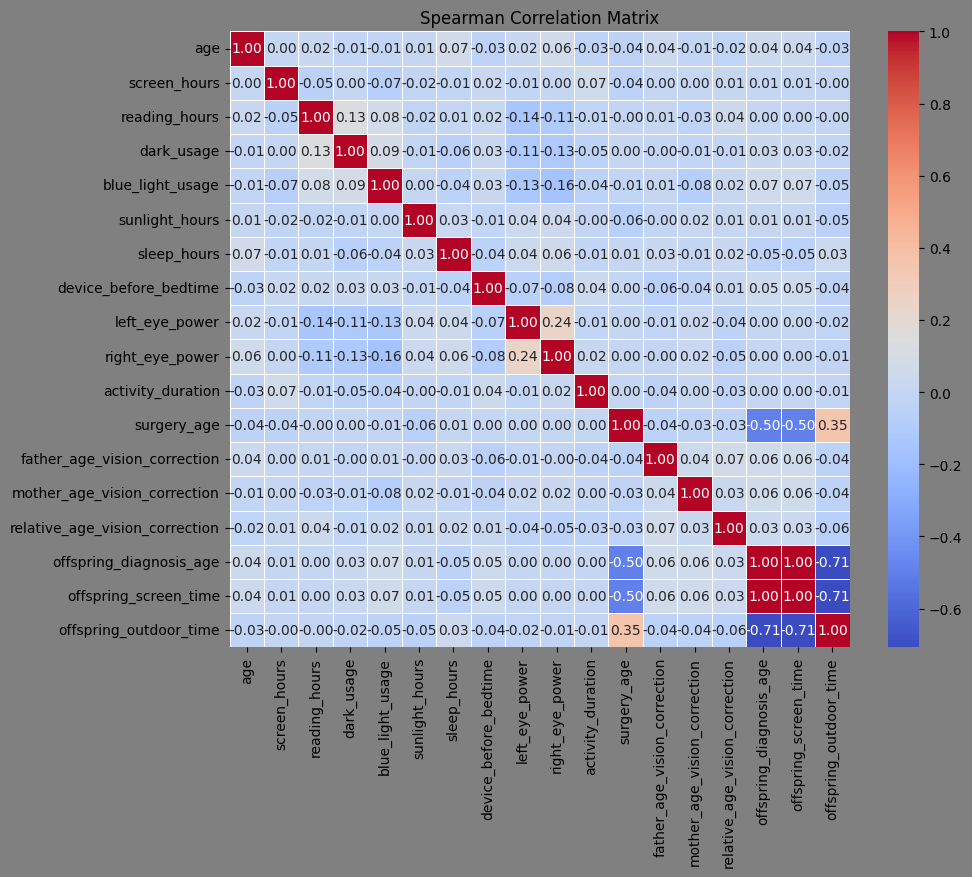

In [28]:
def plot_spearman_correlation_matrix_seaborn(data_01, numeric_columns):
    """
    Plot the Spearman correlation matrix as a heatmap using Seaborn and Matplotlib.

    Parameters:
    ----------
    data_01 : pandas.DataFrame
        The DataFrame containing the data. It must have numeric columns for correlation calculation.

    numeric_columns : list
        A list of column names (strings) in the DataFrame `data_01` that are numeric and should be used for
        Spearman's rank correlation.
    """
    spearman_corr_matrix = data_01[numeric_columns].corr(method='spearman')

    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True, facecolor='white')
    plt.title('Spearman Correlation Matrix')
    plt.gca().set_facecolor('grey')  # Set the axes background color to white
    plt.gcf().set_facecolor('grey')  # Set the figure background color to white
    plt.show()

plot_spearman_correlation_matrix_seaborn(data_01, numerical_columns)

In [29]:
# correlation = spearman_correlation(data_01, numerical_columns)
# correlation.to_csv('correlation.csv', index=False)

In [30]:
# Crosstab Analysis with Chi-Square Test
def chi_square_crosstab(data_01, categorical_columns):
    """
    Perform Chi-Square Test of Independence between each pair of categorical variables in the dataset.

    Parameters:
    ----------
    data_01 : pandas.DataFrame
        The DataFrame containing the data. It must include categorical columns to be tested.

    categorical_columns : list of str
        A list of column names (strings) representing categorical columns to be tested.

    Returns:
    -------
    pandas.DataFrame
        A DataFrame containing the results of the Chi-Square Test of Independence for each pair of categorical variables.
        The DataFrame includes the following columns:
        - 'Categorical Variable 1': The first categorical variable in the pair.
        - 'Categorical Variable 2': The second categorical variable in the pair.
        - 'Chi-Square Statistic': The Chi-Square test statistic.
        - 'p-value': The p-value for the Chi-Square test.
        - 'Degrees of Freedom': The degrees of freedom for the Chi-Square test.
    """

    chi_square_results = []

    for i, var1 in enumerate(categorical_columns):
        for var2 in categorical_columns[i + 1:]:
            contingency_table = pd.crosstab(data_01[var1], data_01[var2])

            chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

            chi_square_results.append({
                'Categorical Variable 1': var1,
                'Categorical Variable 2': var2,
                'Chi-Square Statistic': chi2_stat,
                'p-value': p_value,
                'Degrees of Freedom': dof
            })

    return pd.DataFrame(chi_square_results)
chi_square_crosstab(data_01, categorical_columns)

,Categorical Variable 1,Categorical Variable 2,Chi-Square Statistic,p-value,Degrees of Freedom
0,gender,occupation,27.320268,1.712447e-05,4
1,gender,education,9.457364,3.051929e-01,8
2,gender,environment,2.873507,9.004845e-02,1
3,gender,device,19.536756,1.073784e-01,13
4,gender,screen_use_purpose,39.822162,8.688684e-02,29
...,...,...,...,...,...
736,relative_tools,district,197.492862,1.040722e-22,40
737,relative_tools,has_or_had_glasses,604.494071,1.650353e-129,4
738,relative_vision_problems,district,246.853904,5.443666e-01,250
739,relative_vision_problems,has_or_had_glasses,855.759981,2.041097e-164,25


In [31]:
# crosstab = chi_square_crosstab(data_01, categorical_columns)
# crosstab.to_csv('crosstab.csv', index=False)

In [32]:
def chi_square_independence(data_01, categorical_columns):
    """
    Perform Chi-Square Test for Independence between pairs of categorical columns.

    This function calculates the Chi-Square Test for Independence for each pair of categorical columns in the
    input DataFrame `data_01`. It computes the Chi-Square statistic, p-value, degrees of freedom,
    and the expected frequency table for each pair.

    Parameters:
    ----------
    data_01 : pandas.DataFrame
        The DataFrame containing the data. It must have categorical columns for the Chi-Square test.

    categorical_columns : list
        A list of column names (strings) in the DataFrame `data_01` that are categorical and should be used for
        the Chi-Square Test for Independence.

    Returns:
    -------
    pandas.DataFrame
        A DataFrame containing the results of the Chi-Square Test for Independence for each pair of categorical columns.
        The DataFrame includes the following columns:
        - 'Column 1': Name of the first column in the pair.
        - 'Column 2': Name of the second column in the pair.
        - 'Chi-Square Statistic': The Chi-Square statistic for the test.
        - 'p-value': The p-value associated with the Chi-Square test.
        - 'Degrees of Freedom': The degrees of freedom for the test.
        - 'Expected Frequencies': The expected frequencies under the null hypothesis of independence.

    Example:
    --------
    chi_square_df = chi_square_independence(data_01, ['col1', 'col2', 'col3'])

    This will compute the Chi-Square Test for Independence for all pairs of columns 'col1', 'col2', and 'col3'
    in the DataFrame `data_01` and return the results in `chi_square_df`.
    """

    chi_square_results = []

    for i, col1 in enumerate(categorical_columns):
        for col2 in categorical_columns[i+1:]:
            contingency_table = pd.crosstab(data_01[col1], data_01[col2])

            chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

            chi_square_results.append({
                'Column 1': col1,
                'Column 2': col2,
                'Chi-Square Statistic': chi2_stat,
                'p-value': p_val,
                'Degrees of Freedom': dof,
                'Expected Frequencies': expected
            })

    return pd.DataFrame(chi_square_results)
chi_square_independence(data_01, categorical_columns)

,Column 1,Column 2,Chi-Square Statistic,p-value,Degrees of Freedom,Expected Frequencies
0,gender,occupation,27.320268,1.712447e-05,4,"[[15.276988636363637, 49.39559659090909, 13.74..."
1,gender,education,9.457364,3.051929e-01,8,"[[364.1015625, 11.712357954545455, 9.166193181..."
2,gender,environment,2.873507,9.004845e-02,1,"[[581.0348011363636, 135.96519886363637], [559..."
3,gender,device,19.536756,1.073784e-01,13,"[[113.55894886363636, 105.4112215909091, 131.3..."
4,gender,screen_use_purpose,39.822162,8.688684e-02,29,"[[108.46661931818181, 0.5092329545454546, 3.05..."
...,...,...,...,...,...,...
736,relative_tools,district,197.492862,1.040722e-22,40,"[[0.171875, 26.46875, 0.34375, 30.9375, 0.1718..."
737,relative_tools,has_or_had_glasses,604.494071,1.650353e-129,4,"[[17.1875, 224.8125], [20.3125, 265.6875], [5...."
738,relative_vision_problems,district,246.853904,5.443666e-01,250,"[[0.1328125, 20.453125, 0.265625, 23.90625, 0...."
739,relative_vision_problems,has_or_had_glasses,855.759981,2.041097e-164,25,"[[13.28125, 173.71875], [0.07102272727272728, ..."


In [33]:
# independence = chi_square_independence(data_01, categorical_columns)
# independence.to_csv('independence.csv', index=False)

In [34]:
def mann_whitney_u_test_all_pairs(data_01, numeric_columns, group_column):
    """
    Perform Mann-Whitney U Test between each pair of numeric variables, grouped by a categorical column.

    This function calculates the Mann-Whitney U Test between all pairs of numeric variables in `numeric_columns`,
    for each pair of groups defined by the `group_column`. It compares the distribution of each pair of numeric variables
    between the two groups and returns the results.

    Parameters:
    ----------
    data_01 : pandas.DataFrame
        The DataFrame containing the data. It must include numeric columns and a categorical column for grouping.

    numeric_columns : list of str
        A list of column names (strings) representing numeric columns to be tested.

    group_column : str
        The name of the categorical column used to group the data into two distinct groups for the Mann-Whitney U test.

    Returns:
    -------
    pandas.DataFrame
        A DataFrame containing the results of the Mann-Whitney U Test for each pair of numeric variables.
        The DataFrame includes the following columns:
        - 'Numeric Variable 1': The first numeric variable in the pair.
        - 'Numeric Variable 2': The second numeric variable in the pair.
        - 'U-statistic': The Mann-Whitney U statistic for the test.
        - 'p-value': The p-value for the test.

    Example:
    --------
    mann_whitney_df = mann_whitney_u_test_all_pairs(data_01, ['col1', 'col2', 'col3'], 'group_col')

    This will compute the Mann-Whitney U Test for all pairs of numeric columns ['col1', 'col2', 'col3']
    in `data_01`, grouped by the `group_col`, and return the results in `mann_whitney_df`.
    """

    groups = data_01[group_column[0]].dropna().unique()

    mann_whitney_results = []

    for i, var1 in enumerate(numeric_columns):
        for var2 in numeric_columns[i+1:]:

            group1_data_var1 = data_01[data_01[group_column[0]] == groups[0]][var1].dropna()
            group2_data_var1 = data_01[data_01[group_column[0]] == groups[1]][var1].dropna()
            group1_data_var2 = data_01[data_01[group_column[0]] == groups[0]][var2].dropna()
            group2_data_var2 = data_01[data_01[group_column[0]] == groups[1]][var2].dropna()

            u_stat_var1, p_val_var1 = stats.mannwhitneyu(group1_data_var1, group2_data_var1, alternative='two-sided')
            u_stat_var2, p_val_var2 = stats.mannwhitneyu(group1_data_var2, group2_data_var2, alternative='two-sided')

            mann_whitney_results.append({
                'Numeric Variable 1': var1,
                'Numeric Variable 2': var2,
                'U-statistic (Var1)': u_stat_var1,
                'p-value (Var1)': p_val_var1,
                'U-statistic (Var2)': u_stat_var2,
                'p-value (Var2)': p_val_var2
            })

    return pd.DataFrame(mann_whitney_results)

mann_whitney_u_test_all_pairs(data_01, numerical_columns, categorical_columns)

,Numeric Variable 1,Numeric Variable 2,U-statistic (Var1),p-value (Var1),U-statistic (Var2),p-value (Var2)
0,age,screen_hours,250248.5,0.738150,242967.0,0.529974
1,age,reading_hours,250248.5,0.738150,241288.0,0.392862
2,age,dark_usage,250248.5,0.738150,232142.0,0.036906
3,age,blue_light_usage,250248.5,0.738150,256494.5,0.237834
4,age,sunlight_hours,250248.5,0.738150,250142.0,0.745009
...,...,...,...,...,...,...
148,relative_age_vision_correction,offspring_screen_time,235397.0,0.102787,248427.0,0.157671
149,relative_age_vision_correction,offspring_outdoor_time,235397.0,0.102787,247722.5,0.999433
150,offspring_diagnosis_age,offspring_screen_time,248427.0,0.157671,248427.0,0.157671
151,offspring_diagnosis_age,offspring_outdoor_time,248427.0,0.157671,247722.5,0.999433


In [35]:
# mann_whitney = mann_whitney_u_test_all_pairs(data_01, numerical_columns, categorical_columns)
# mann_whitney.to_csv('mann_whitney.csv', index=False)

# Train - Test Split

In [36]:
label_encoder = LabelEncoder()
for col in categorical_cols:  # Selects only object columns
    data_01[col] = label_encoder.fit_transform(data_01[col])

In [37]:
for col in numerical_cols: #Select number columns
    data_01[col] = pd.to_numeric(data_01[col], errors='coerce')

In [38]:
scaler = MinMaxScaler()
data_01[numerical_cols] = scaler.fit_transform(data_01[numerical_cols])

In [39]:
X = data_01.drop(['has_or_had_glasses'], axis=1)
y = data_01['has_or_had_glasses']

In [40]:
missing_values = X.isnull().sum()
print("Missing values before imputation:\n", missing_values[missing_values>0])

Missing values before imputation:
 Series([], dtype: int64)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=75)

In [42]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [43]:
data_train.shape
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1056 entries, 636 to 248
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             1056 non-null   float64
 1   gender                          1056 non-null   int64  
 2   occupation                      1056 non-null   int64  
 3   education                       1056 non-null   int64  
 4   environment                     1056 non-null   int64  
 5   screen_hours                    1056 non-null   float64
 6   device                          1056 non-null   int64  
 7   screen_use_purpose              1056 non-null   int64  
 8   screen_symptoms                 1056 non-null   int64  
 9   reading_medium                  1056 non-null   int64  
 10  reading_hours                   1056 non-null   float64
 11  night_mode                      1056 non-null   int64  
 12  theme_usage                     1056 n

In [44]:
data_test.shape
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352 entries, 167 to 137
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             352 non-null    float64
 1   gender                          352 non-null    int64  
 2   occupation                      352 non-null    int64  
 3   education                       352 non-null    int64  
 4   environment                     352 non-null    int64  
 5   screen_hours                    352 non-null    float64
 6   device                          352 non-null    int64  
 7   screen_use_purpose              352 non-null    int64  
 8   screen_symptoms                 352 non-null    int64  
 9   reading_medium                  352 non-null    int64  
 10  reading_hours                   352 non-null    float64
 11  night_mode                      352 non-null    int64  
 12  theme_usage                     352 non

In [45]:
data_train.to_csv('data_train.csv', index=False)
data_test.to_csv('data_test.csv', index=False)

# Smote

In [46]:
data_train = pd.read_csv('data_train.csv')
data_test = pd.read_csv('data_test.csv')

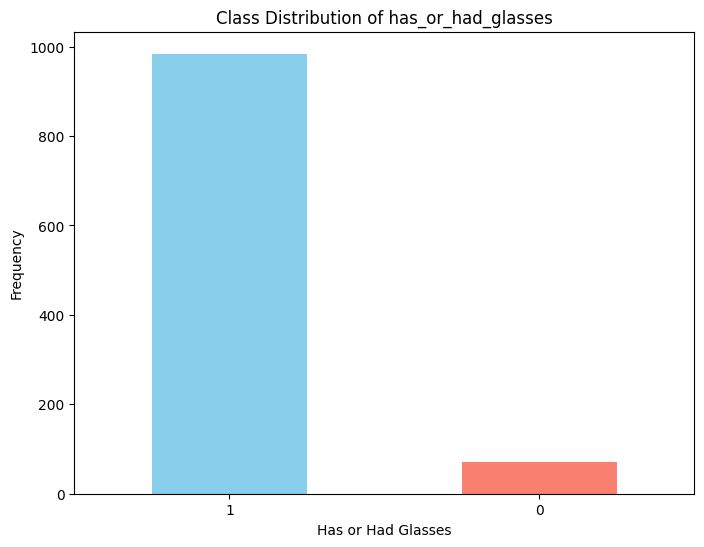

In [47]:
class_distribution = data_train['has_or_had_glasses'].value_counts()
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution of has_or_had_glasses')
plt.xlabel('Has or Had Glasses')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [48]:
class_percentages = (class_distribution / len(data_train)) * 100
print("Class Distribution:")
print(class_distribution)
print("\nClass Percentages:")
print(class_percentages)
if class_percentages.min() < 30:
    print("\nConclusion: The dataset is imbalanced.")
else:
    print("\nConclusion: The dataset is balanced or nearly balanced.")

Class Distribution:
has_or_had_glasses
1    984
0     72
Name: count, dtype: int64

Class Percentages:
has_or_had_glasses
1    93.181818
0     6.818182
Name: count, dtype: float64

Conclusion: The dataset is imbalanced.


In [49]:
X = data_train.drop(['has_or_had_glasses'], axis=1)
y = data_train['has_or_had_glasses']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [51]:
smote = SMOTE(random_state=42, k_neighbors=5)

In [52]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [53]:
y_train_resampled_distribution = y_train_resampled.value_counts()
y_train_resampled_percentages = (y_train_resampled_distribution / len(y_train_resampled)) * 100

In [54]:
num_synthetic_rows = X_train_resampled.shape[0] - X_train.shape[0]

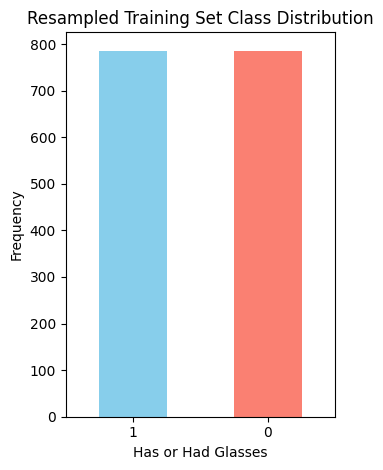

In [55]:
plt.subplot(1, 2, 2)
y_train_resampled_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Resampled Training Set Class Distribution')
plt.xlabel('Has or Had Glasses')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [56]:
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
X_train_resampled_df['has_or_had_glasses'] = y_train_resampled

In [57]:
data_01 = X_train_resampled_df.copy()

In [58]:
data_01.to_csv('data_train_main.csv', index=False)

# Stepwise Logistic Regression

In [59]:
data_train = pd.read_csv('data_train_main.csv')
data_test = pd.read_csv('data_test.csv')

In [60]:
X_train = data_train.drop(['has_or_had_glasses'], axis=1)
y_train = data_train['has_or_had_glasses']

In [61]:
X_test = data_test.drop(['has_or_had_glasses'], axis=1)
y_test = data_test['has_or_had_glasses']

In [62]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1572, 56)
y_train shape: (1572,)


In [63]:
print("X_train shape:", X_test.shape)
print("y_train shape:", y_test.shape)

X_train shape: (352, 56)
y_train shape: (352,)


In [64]:
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

In [65]:
sfs = SFS(LogisticRegression(solver='liblinear', penalty='l1'),  # Add L1 regularization
          k_features=10,
          forward=True,
          floating=True,
          scoring='accuracy',
          cv=5,
          n_jobs=-1)

In [66]:
sfs = sfs.fit(X_train_copy, y_train_copy)

In [67]:
selected_features = list(sfs.k_feature_names_)
print("Selected features:", selected_features)

Selected features: ['age', 'occupation', 'education', 'screen_hours', 'outdoor_activity', 'sleep_hours', 'lighting_conditions', 'reading_hours', 'sunlight_hours', 'exercise_frequency']


# Logistic Regression

In [69]:
X_train_selected = X_train_copy[selected_features]

In [70]:
X_train_selected_with_constant = sm.add_constant(X_train_selected)

In [71]:
logit_model = sm.Logit(y_train_copy, X_train_selected_with_constant).fit_regularized(method='l1')

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.40307288458924706
            Iterations: 75
            Function evaluations: 75
            Gradient evaluations: 75


In [72]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:     has_or_had_glasses   No. Observations:                 1572
Model:                          Logit   Df Residuals:                     1560
Method:                           MLE   Df Model:                           11
Date:                Sun, 27 Apr 2025   Pseudo R-squ.:                  0.4185
Time:                        09:07:27   Log-Likelihood:                -633.63
converged:                       True   LL-Null:                       -1089.6
Covariance Type:            nonrobust   LLR p-value:                1.636e-188
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3048      0.543     -0.562      0.574      -1.369       0.759
age                     1.4971      0.697      2.146      0.032       0.130       2.864
screen_hours    

In [73]:
import plotly.express as px

ranked_features = {
    'reading_hours': 17.709124,
    'dark_usage': 2.341641,
    'age': 1.497100,
    'sleep_hours': 1.258598,
    'screen_hours': 0.659592,
    'occupation': 0.521482,
    'sunlight_hours': 0.448405,
    'lighting_conditions': 0.399558,
    'outdoor_activity': 0.201879,
    'exercise_frequency': 0.144893,
    'education': 0.070323
}

data = {'variable': list(ranked_features.keys()), 'importance': list(ranked_features.values())}

fig = px.pie(data, names='variable', values='importance',
             title='Updated Variable Contribution to Glasses Prediction',
             hover_data=['importance'],
             labels={'importance': 'Relative Importance'},
             color_discrete_sequence=px.colors.qualitative.Pastel,
             width=800,
             height=800)

fig.update_traces(textinfo='percent+label', pull=[0.03]*len(ranked_features))
fig.update_layout(title_font_size=20, title_x=0.5, uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

Assumption

In [74]:
print("\n1. Binary Outcome:")
print("The target variable has values:", y_train.unique())
if len(y_train.unique()) == 2:
    print("Assumption met: The outcome is binary (0 and 1).")
else:
    print("Assumption NOT met: The outcome is not binary.")


1. Binary Outcome:
The target variable has values: [1 0]
Assumption met: The outcome is binary (0 and 1).


In [75]:
print("\n2. Independence of Observations:")


2. Independence of Observations:


In [76]:
print("\n3. Multicollinearity")
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_selected_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_selected_with_constant.values, i)
                   for i in range(X_train_selected_with_constant.shape[1])]
print(vif_data)


3. Multicollinearity
                feature        VIF
0                 const  61.377547
1                   age   1.722844
2          screen_hours   1.044998
3           sleep_hours   1.031388
4         reading_hours   1.172608
5            dark_usage   1.184457
6        sunlight_hours   1.096530
7            occupation   1.692893
8             education   1.090508
9      outdoor_activity   1.027444
10  lighting_conditions   1.040160
11   exercise_frequency   1.044313


In [77]:
rank = np.linalg.matrix_rank(X_train_selected_with_constant)
print(f"Matrix rank: {rank}, Columns: {X_train_selected_with_constant.shape[1]}")

Matrix rank: 12, Columns: 12


In [78]:
coefficients = logit_model.params
p_values = logit_model.pvalues

In [79]:
ranked_features = abs(coefficients).sort_values(ascending=False)
print("\nRanked Features by Absolute Coefficient Value:")
print(ranked_features)


Ranked Features by Absolute Coefficient Value:
reading_hours          17.709124
dark_usage              2.341641
age                     1.497100
sleep_hours             1.258598
screen_hours            0.659592
occupation              0.521482
sunlight_hours          0.448405
lighting_conditions     0.399558
const                   0.304844
outdoor_activity        0.201879
exercise_frequency      0.144893
education               0.070323
dtype: float64


# Model

In [80]:
data_train = pd.read_csv('data_train_main.csv')
data_test = pd.read_csv('data_test.csv')

In [81]:
X_train = data_train.drop(['has_or_had_glasses'], axis=1)
y_train = data_train['has_or_had_glasses']

In [82]:
X_test = data_test.drop(['has_or_had_glasses'], axis=1)
y_test = data_test['has_or_had_glasses']

In [83]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [84]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [85]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss=keras.losses.BinaryCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

In [86]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [87]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [88]:
model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5903 - loss: 0.7540 - val_accuracy: 0.8324 - val_loss: 0.5327
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6358 - loss: 0.6811 - val_accuracy: 0.7216 - val_loss: 0.5800
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7112 - loss: 0.6044 - val_accuracy: 0.6477 - val_loss: 0.6171
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7305 - loss: 0.5951 - val_accuracy: 0.6506 - val_loss: 0.6160
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7478 - loss: 0.5446 - val_accuracy: 0.6676 - val_loss: 0.6205
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7637 - loss: 0.5503 - val_accuracy: 0.6562 - val_loss: 0.6274
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7661 - loss: 0.5412 - val_accuracy: 0.6847 - val_loss: 0.5907
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7733 - loss: 0.5292 - val_accuracy: 0.6733 - 

In [89]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,253 (145.52 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 24,580 (96.02 KB)

In [90]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7923 - loss: 0.5499 


In [91]:
y_pred_probs = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [92]:
y_pred = (y_pred_probs > 0.5).astype(int)

In [93]:
logloss = log_loss(y_test, y_pred_probs)

In [94]:
weights = model.get_weights()

In [95]:
first_layer_weights = weights[0]

In [96]:
nn_coefficients = np.abs(first_layer_weights).sum(axis=1)

In [97]:
feature_names = X_train.columns
for name, coef in zip(feature_names, nn_coefficients):
    print(f"{name}: {coef:.4f}")

age: 13.1876
screen_hours: 14.1040
sleep_hours: 13.0810
reading_hours: 14.0384
dark_usage: 13.5537
sunlight_hours: 11.9937
occupation: 14.4404
education: 12.2356
outdoor_activity: 13.6797
lighting_conditions: 13.2252
exercise_frequency: 12.5969


In [98]:
print(f'Neural Network Test Accuracy: {test_accuracy:.4f}')

Neural Network Test Accuracy: 0.8324


In [99]:
print(f'Log Loss (Calibration Check): {logloss:.4f}')

Log Loss (Calibration Check): 0.5073


In [100]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.18      0.32      0.23        28
         1.0       0.94      0.88      0.91       324

    accuracy                           0.83       352
   macro avg       0.56      0.60      0.57       352
weighted avg       0.88      0.83      0.85       352



Confusion Matrix:


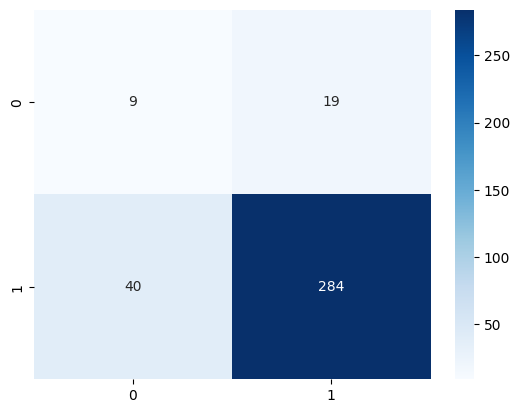

In [101]:
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [102]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

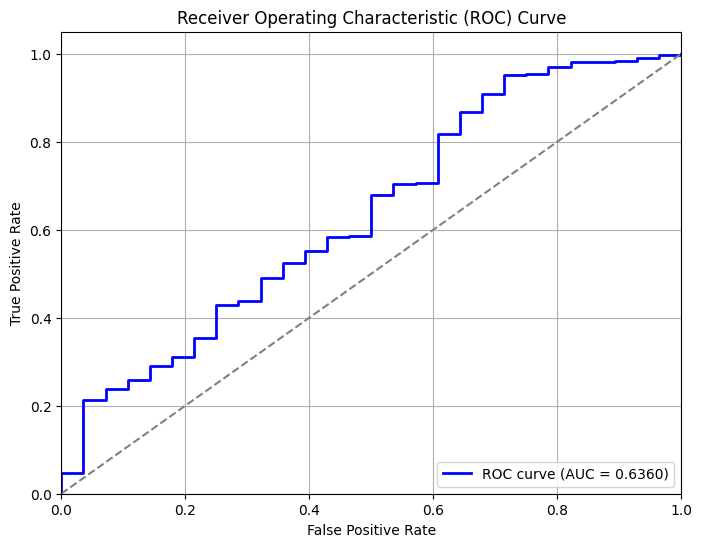

AUC Score: 0.6360


In [103]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print the AUC score
print(f"AUC Score: {roc_auc:.4f}")

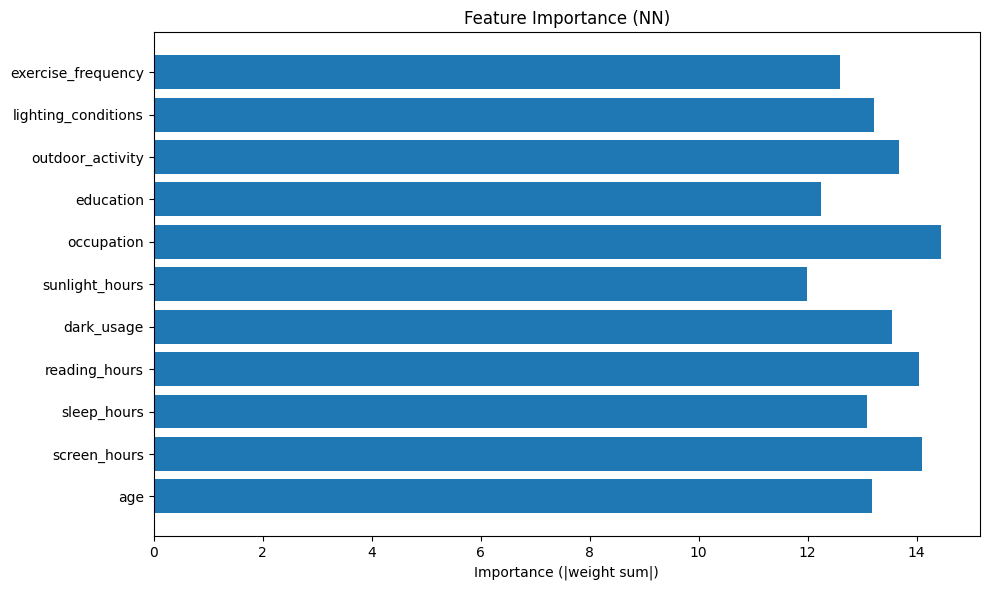

In [104]:
plt.figure(figsize=(10,6))
plt.barh(feature_names, nn_coefficients)
plt.xlabel("Importance (|weight sum|)")
plt.title("Feature Importance (NN)")
plt.tight_layout()
plt.show()

In [106]:
print("The End")

The End
